<a href="https://colab.research.google.com/github/Firojpaudel/Machine-Learning-Notes/blob/main/Practical%20Deep%20Learning%20For%20Coders/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training a Digit Classifier

In [65]:
#First initializing the notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastai.vision.all import *
from fastbook import *

### **Lesson 1:** How images are represented in a computer:

For the initial learning, I'm just creating a model that classifies any image as *3 or 7*. Before that, downloading a sample of MNIST that contains images of just these digits

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
## Checking the directory
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train')]

In [6]:
## Checking what's inside the training set
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

So, yeah! there are images of 7 and 3 in the training set. The images inside these folders are labelled accordingly.

In [7]:
## Taking a look in these folders to check the images.
three = (path/'train'/'3').ls().sorted()
seven= (path/'train'/'7').ls().sorted()

In [8]:
three

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [9]:
seven

(#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.png'),Path('/root/.fastai/data/mnist_sample/train/7/10063.png'),Path('/root/.fastai/data/mnist_sample/train/7/10077.png'),Path('/root/.fastai/data/mnist_sample/train/7/10086.png')...]

They are all full of .png files.


In [10]:
## Taking a look at one of them
img3 = Image.open(three[0])
img3

In computer as we know all data is represented as a number, we have to convert the images into an array or tensor before model training.

In [11]:
## Converting to array
array(img3)

'''
This is similar to doing:
array = np.array(img3)
array

'''

'\nThis is similar to doing:\narray = np.array(img3)\narray\n\n'

In [12]:
#@ Side learnings:
#@ If we wish to see the array from particular index in both rows and columns, we could do like:
np.array(img3)[4:10,4:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

In [13]:
## Now, in pytorch, it's kinda different. We have tensors instead of arrays
tensor(img3)[4:10, 4:10]

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

Also, we could do sth like color coding in pandas.

In [14]:
#@ Visualizing in pandas
df= pd.DataFrame(tensor(img3)[3:13, 9:19])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,42,118,219,166,118,118,6,0
2,0,103,242,254,254,254,254,254,66,0
3,0,18,232,254,254,254,254,254,238,70
4,0,0,104,244,254,224,254,254,254,141
5,0,0,0,207,254,210,254,254,254,34
6,0,0,0,84,206,254,254,254,254,41
7,0,0,0,0,24,209,254,254,254,171
8,0,0,0,91,137,253,254,254,254,112
9,0,40,214,250,254,254,254,254,254,34


### **First Try:** Pixel Similarity


* Step1: Would be to get the average of pixel values for each of our two groups

In [15]:
#@ Creating tensors containg a single image
seven_tensors = [tensor(Image.open(o)) for o in seven]
three_tensors = [tensor(Image.open(o)) for o in three]

#@ Checking the lengths of these created tensors
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

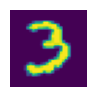

In [16]:
#! Just checking the tensor:
show_image(three_tensors[4])

In [17]:
#@ Now stacking
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

#@ Checking the Shape
stacked_threes.shape

torch.Size([6131, 28, 28])

**The meaning of this output:**<br>
It's trying to say that we have 6,131 images, each of size 28×28 pixels.


<details>
  <summary>
    <b>The reason behind converting to float and dividing by 255</b>
  </summary>
- Some of the operations in PyTorch, such as taking means, require us to cast our integer types into float types. So, converting the stacks to float as well.<br>
- When converted to float, the pixel values are also expected to be in between 0 to 1. So dividing by 255.  
</details>

In [18]:
#@ Gettig the rank of the tensor
len(stacked_threes.shape)

'''
This is similar to doing:
stacked_threes.shape
'''


'\nThis is similar to doing:\nstacked_threes.shape\n'

##### **Ranks defined**:
\- Here's what the rank of tensors mean:
  - **Rank 0**= Scalar, *real number or constant*
  - **Rank 1**= Vector, *can be represente as list of values*
  - **Rank 2**= Matrix, *to represent 2D data structures*
  - **Rank 3**= 3D Tensor, *cube or stack of matrices*
  - **Rank 4**= 4D Tensor, *to represent images in batch form: where the 4th dimension reprents the batch size*




<Axes: >

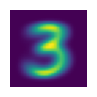

In [19]:
#@ Now computing the mean and looking at what we should be expecting for peak image for 3 (for classification)
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

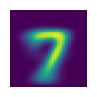

In [20]:
#@ Doing the same for seven
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

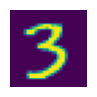

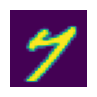

In [21]:
## Just picking an arbitary 3s or 7s and seeing how far are we from the "ideal digits"
arb_3 = stacked_threes[1]
show_image(arb_3)

arb_7 = stacked_sevens[1]
show_image(arb_7)

<details>
  <summary>
    Measuring the distances:
  </summary>
- Take the mean of absolute value of differences. Also called as <i>L1 Norm</i> <br>
- Then find the Root Mean Sqaured Error (RMSE). Also called as <i>L2 Norm</i>
</details>

In [22]:
#@ Implementing the above information

dist_3_abs = (arb_3 - mean3).abs().mean() #L1 Norm
dist_3_sqr = ((arb_3 - mean3)**2).mean().sqrt() #L2 Norm
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [23]:
dist_7_abs= (arb_7 - mean7).abs().mean()
dist_7_sqr= ((arb_7 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1304), tensor(0.2585))

In [24]:
#@ Now implementing the same using loss functions.
import torch.nn.functional as F

F.l1_loss(arb_3.float(), mean3), F.mse_loss(arb_3, mean3).sqrt() #l1 stands for L1 Norm and mse is just L2 Norm

(tensor(0.1114), tensor(0.2021))

##### Numpy Arrays and PyTorch tensors

So, this part it's just a revision about what Numpy arrays and tensors are.

<details>
  <summary>
    <b>Why use Numpy arrays?</b>
  </summary>
Since they are built using optimized C code, Numpy arrays are way way faster than the python code.
</details>

<details>
  <summary>
    <b>Why PyTorch Tensors?</b>
  </summary>
They do the same task as Numpy array. Just more specified with GPUs.
</details>

In [25]:
#@ Showing in code:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
tnsr = torch.tensor(data)
ary= np.array(data)

In [26]:
tnsr

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [27]:
ary

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [28]:
#@ Performing just basic drills:
print(f"Tensor's shape: {tnsr.shape}")
print(f"Accessing 1st row of tensor: {tnsr[0]}")
print(f"Accessing 2st column of tensor: {tnsr[:, 1]}")

Tensor's shape: torch.Size([3, 3])
Accessing 1st row of tensor: tensor([1, 2, 3])
Accessing 2st column of tensor: tensor([2, 5, 8])


In [29]:
#!! More drillings further:
print("Sliced displays:")
print(f"Accessing the 1st row 2nd column value: {tnsr[0, 1]}")
print(f"Accessing the 1st rows 2nd and 3rd column values: {tnsr[0, 1:3]}") #Here, for a:b the output would be only till a to b-1

Sliced displays:
Accessing the 1st row 2nd column value: 2
Accessing the 1st rows 2nd and 3rd column values: tensor([2, 3])


In [30]:
#@ Just lookig at the tensor type
print(f"The tensor's type: {tnsr.type()}")
print(f"The datatype of this tensor: {tnsr.dtype}")

The tensor's type: torch.LongTensor
The datatype of this tensor: torch.int64


In [31]:
##@ Comuptations in tensor is simple:
print(f"The mean of tensor is: {tnsr.float().mean()}") #As mentioned earlier, means can't be calculated until and unless its float datatype
print(f"Multiplying the tensor with 0.01 we get: {tnsr*0.01}")

The mean of tensor is: 5.0
Multiplying the tensor with 0.01 we get: tensor([[0.0100, 0.0200, 0.0300],
        [0.0400, 0.0500, 0.0600],
        [0.0700, 0.0800, 0.0900]])


##### Computing Metrics Using Broadcasting

In [32]:
## Creating the valid set tensors
valid_3_tnsr = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tnsr = valid_3_tnsr.float()/255
valid_7_tnsr = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tnsr = valid_7_tnsr.float()/255

#@ Checking their shapes
print(f"Shape of valid 3s: {valid_3_tnsr.shape}")
print(f"Shape of valid 7s: {valid_7_tnsr.shape}")

Shape of valid 3s: torch.Size([1010, 28, 28])
Shape of valid 7s: torch.Size([1028, 28, 28])


In [33]:
## Function for calculating MAE:
def mnist_distance(a, b):
    return (a-b).abs().mean((-1, -2)) #!! Tells PyTorch that we want to take the mean ranging over values indexed by last two axes of tensor.

mnist_distance(arb_3, mean3)

tensor(0.1114)

In [34]:
#@ Implementing MAE on the valid sets:
valid_3_dist = mnist_distance(valid_3_tnsr, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1334, 0.1305, 0.1308,  ..., 0.1283, 0.1192, 0.1086]),
 torch.Size([1010]))

<details>
  <summary>
    <b>The concept of broadcasting </b>
  </summary>
Broadcasting is a powerful feature in PyTorch that allows you to perform operations on tensors of different shapes without explicitly reshaping them. Here's a breakdown of how it works:<br>
When we perform an operation between two tensors of different ranks (dimensions), PyTorch automatically expands the smaller tensor to match the shape of the larger tensor. <i>This process is called broadcasting</i>. It simplifies tensor operations and makes the code more concise.
</details>

In [35]:
#@ Simple example to illustrate broadcasting:

##! Performing calculations in normal operations:
a = torch.tensor([10., 6, -4]) #Tensor of shape 3
b = torch.tensor([2., 8, 7])   #Tensor of shape 3
print("The normal operation a+b:", a + b)

##! Changing the shape of tensor a:
a= torch.tensor(1)
print("After changing the shape of tensor a: ", a.ndim)
print("We got the rank of a to be scalar")
print("Checking the rank of unchanged tensor b: ", b.ndim)
print("And b is of rank 1 which is vector.")

The normal operation a+b: tensor([12., 14.,  3.])
After changing the shape of tensor a:  0
We got the rank of a to be scalar
Checking the rank of unchanged tensor b:  1
And b is of rank 1 which is vector.


So theoritically, we should not be able to perform operations between scalars and vectors. **But that's where broadcasting kicks in.**

In [36]:
## Seeing broadcasting in action:
res = a+b #Broadcasting in the backend of PyTorch
print("So adding two gives:",res)

So adding two gives: tensor([3., 9., 8.])


<details>
  <summary>
      <b>Why is this effecient anyway? </b>
  </summary>
Broadcasting is efficient because PyTorch doesn't actually copy the smaller tensor multiple times. Instead, it pretends the tensor has the larger shape and performs the operation in a highly optimized manner, often in C or CUDA for GPUs. This makes tensor operations both expressive and performant.
</details>

In [37]:
#@ Using this concept to figure out whether an image is 3 by using the following logic:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

print(is_3(arb_3), is_3(arb_3).float())

print("The float value of 1.0 here means True")

tensor(True) tensor(1.)
The float value of 1.0 here means True


In [38]:
#@ Thanks to broadcasting, we can also test it on the full validation set of 3s
is_3(valid_3_tnsr)

tensor([True, True, True,  ..., True, True, True])

In [39]:
## Now calculating accuracies
accuracy_3= is_3(valid_3_tnsr).float().mean()
accuracy_7= is_3(valid_7_tnsr).float().mean()
accuracy_3, accuracy_7

(tensor(0.9168), tensor(0.0146))

So, for the function `is_3()` the `valid_3_tenr` gave the probability value closer to 1 meaning the accuracy is valid. Now testig the same for `def is_7()`

In [40]:
#@ Back to 7
def is_7(x):
    return mnist_distance(x, mean7) < mnist_distance(x, mean3)

is_7(arb_7), is_7(arb_7).float()

(tensor(True), tensor(1.))

In [41]:
accuracy_7s = is_7(valid_7_tnsr).float().mean()
accuracy_7s

tensor(0.9854)

In [42]:
#@ But turns out we don't need to test this way:
#@ If we know the concept of probability, the sum total is always 1. So we could do like
accuracy_7 = (1 - is_3(valid_7_tnsr).float()).mean()
accuracy_7

tensor(0.9854)

### **Second Try**: SGD

Instead of trying to find the similarity between an image and an "ideal image", we could look at each individual pixel and come up with a set of weights for each, such that the highest weights are associated with those pixels most likely be black for a particular category.

In [43]:
#@ First going with a simpler most basic approach:

def f(x):                     #!! Initializing the function
  return x**2

#!! Calculating gradients
xt = tensor(3.).requires_grad_()
yt= f(xt)
print(yt)
yt.backward()                 #!! back prop  ---> Calculating the derivative of each layer
xt.grad
print("The value of backprop is:",xt.grad)

tensor(9., grad_fn=<PowBackward0>)
The value of backprop is: tensor(6.)


So, what we get here is the derivation with respect to xt. i.e.,
$\frac{\partial y}{\partial x} =\frac{\partial x^2}{\partial x} = 2x$

In [44]:
#@ Now doing the same for vector arguments in the function
xt= tensor([1., 2., 3.], requires_grad=True)
print("The vector arg xt: ",xt)


#!! Then we add sum to our function so that the function can take vectors (rank1 tensor) and return scalar
def f(x):
  return (x**2).sum()

yt = f(xt)
yt
print(yt)
yt.backward()
xt.grad
print("The values become:", xt.grad)

The vector arg xt:  tensor([1., 2., 3.], requires_grad=True)
tensor(14., grad_fn=<SumBackward0>)
The values become: tensor([2., 4., 6.])


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])


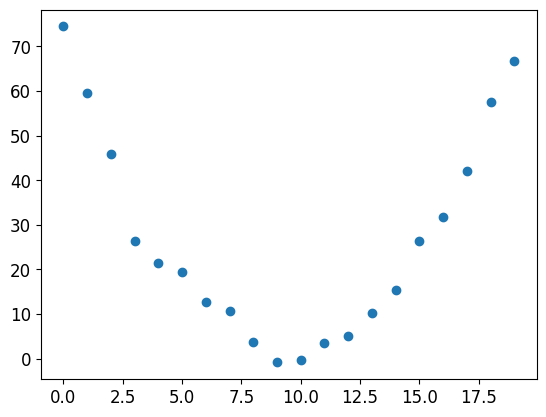

In [45]:
#@ An end to end SGD Example:
time = torch.arange(0, 20).float();
print(time)
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed);

In [46]:
## Implementation of SGD
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

def mse(preds, targets):
  return ((preds-targets)**2).mean()

**Step 1**: Initializing the parameters

In [47]:
#@ We initialize the parameters to random values and ask pyTorch to trach gradients

params = torch.randn(3).requires_grad_()

**Step 2**: Calculating the predictions:

In [48]:
preds = f(time, params)

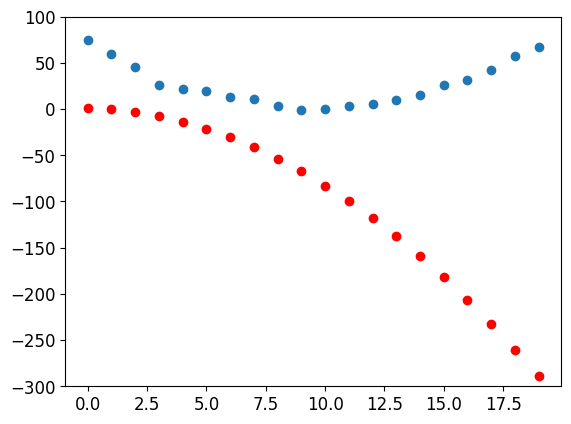

In [49]:
#!! Creating a small function to see how close our predictions are to out tragets

def show_preds(preds, ax= None):
  if ax is None:
    ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

show_preds(preds)

And this doesnot look any close.

**Step 3**: Calculating the Loss

In [50]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

**Step 4:** Calculating the gradients

In [51]:
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [52]:
params.grad * 1e-5 ## Multiplying by 0.00001 which is supposed to be the learning rate

tensor([-0.5320, -0.0342, -0.0025])

**Step 5**: Stepping the weights

In [53]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

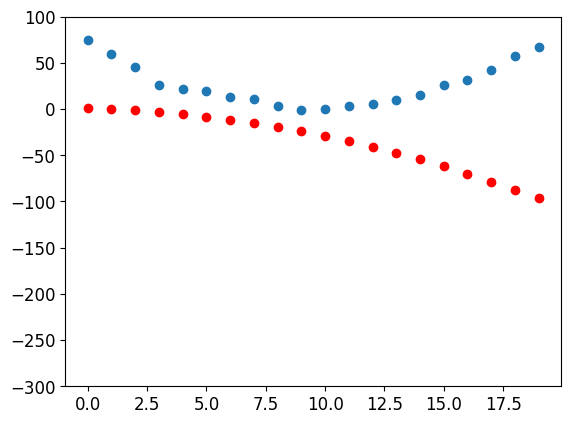

In [54]:
#@ Checking if the loss has improved:
preds = f(time, params)
mse(preds, speed)

show_preds(preds)

And infact it has decreased quite a bit

**Step 6**: Repeating the process

In [55]:
## Defining the function that applies steps

def apply_steps(params, prn= True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

#@ Implementation of the function
for i in range(10):
  apply_steps(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


The loss is now going down over the iterations.

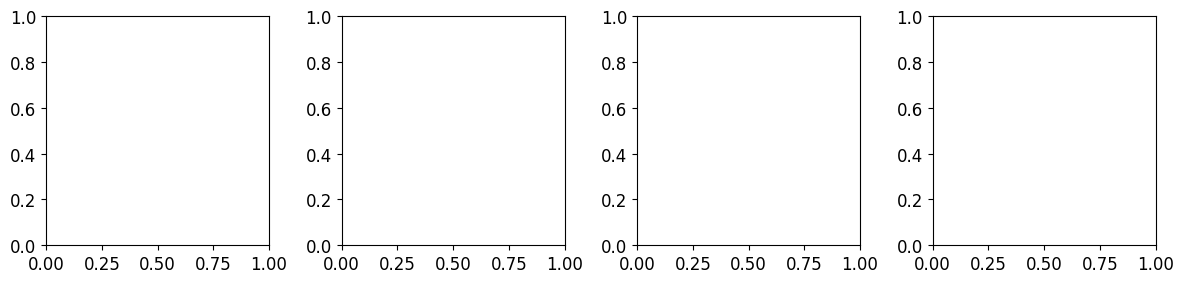

In [68]:
#@ Now visualizing this:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_steps(params, False), ax)
plt.tight_layout()